In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")


## Task 1.1: Load the Home Loan dataset into a Pandas DataFrame.

In [2]:
#load data
# url = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'

df = pd.read_csv('https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# df.describe(include='object')
# df.describe(include='all')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

## Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [8]:
# checking for missing values
# df.isnull().sum().sum() # total missing values
df.isnull().sum() # missing values per column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# checking for  data duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# checking for data type inconsistencies.
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df_copy = df.copy()

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.

In [13]:
# correcting data types
df_copy['ApplicantIncome'] = df_copy['ApplicantIncome'].astype(float)

In [14]:
# Handling missing values
# Numerical columns - Filling missing values with median
numerical_cols_fills = df_copy[['ApplicantIncome','CoapplicantIncome','LoanAmount']].median() #
# Filling missing values in categorical columns with mode
categorical_cols_fills = df_copy[['Gender','Married','Dependents','Self_Employed','Credit_History', 'Loan_Amount_Term']].mode().iloc[0]

#combine the dictionaries into a single dictionary for fillna()
fill_values = numerical_cols_fills.to_dict()
fill_values.update(categorical_cols_fills.to_dict())

#fill missing values
df_copy.fillna(value=fill_values, inplace=True)


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [16]:
df_copy['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [17]:
# # Addressing Outliers
# #using IQR method to identify and cap outliers in numerical columns
# numerical_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
# object_cols = [x for x in numerical_cols if x not in numerical_cols]
# iqr_outliers = {}
# for col in numerical_cols:  
#     Q1 = df_copy[col].quantile(0.25)
#     Q3 = df_copy[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     iqr_outliers[col] = (lower_bound, upper_bound)
#     # Cap the outliers
#     df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound,
#                            np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col]))
#     iqr_outliers = pd.Series(iqr_outliers)
#     print(f"Outlier bounds for {col}: {iqr_outliers[col]}")
#     print(df_copy[col].sum())

In [ ]:
# ----------------------------------------
# Outlier Detection using the IQR Method 
# ----------------------------------------

# Loan_Amount_Term and Credit_History are treated as categorical,
# so they will be excluded from numeric column processing.

# Get the list of numeric columns (integer or float type)
num_cols = [x for x in df_copy.columns if df_copy[x].dtype in ["int64", "float64"]]

# Remove columns that are more categorical in nature
num_cols.remove("Credit_History")
num_cols.remove("Loan_Amount_Term")

# Create a list for object (non-numeric) columns — this line
# seems intended to separate categorical columns, but currently
# creates an empty list since the condition is incorrect.
object_cols = [x for x in num_cols if x not in num_cols]

# Dictionary to store outlier counts per column
iqr_out_counts = {}

# List to store boolean masks of outliers for each column
iqr_masks = []

# Iterate through each numeric column to compute IQR-based outliers
for col in num_cols:
    # Calculate the 1st quartile (Q1)
    Q1 = df_copy[col].quantile(0.25)
    # Calculate the 3rd quartile (Q3)
    Q3 = df_copy[col].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Create a boolean mask for values outside the IQR bounds
    mask = (df_copy[col] < lower) | (df_copy[col] > upper)
    # Count the number of outliers in the column
    iqr_out_counts[col] = mask.sum()
    # Append the mask to the list for later combination
    iqr_masks.append(mask)

# Convert the dictionary of outlier counts to a pandas Series
iqr_out_counts = pd.Series(iqr_out_counts)

# Display summary of outlier counts per column
print("Outlier counts by column (IQR rule):")
# Print only columns that have at least one outlier
print(iqr_out_counts[iqr_out_counts > 0] if iqr_out_counts.sum() > 0 else "No IQR outliers detected")
print()

# -------------------------------------------------------------
# Identify Rows Containing Any Outliers Across All Numeric Columns
# -------------------------------------------------------------

# Combine all boolean masks column-wise, marking rows that have any outlier
any_iqr_out = pd.concat(iqr_masks, axis=1).any(axis=1)

# Extract the subset of rows that contain any outlier
rows_with_iqr_outliers = df_copy[any_iqr_out]

# Print the total number of rows that have one or more IQR outliers
print(f"Number of rows with any IQR outlier: {len(rows_with_iqr_outliers)}")

# Display the first few rows containing outliers
display(rows_with_iqr_outliers.head())


Outlier counts by column (IQR rule):
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           41
dtype: int64

Number of rows with any IQR outlier: 79


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955.0,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500.0,3000.0,320.0,360.0,1.0,Rural,N


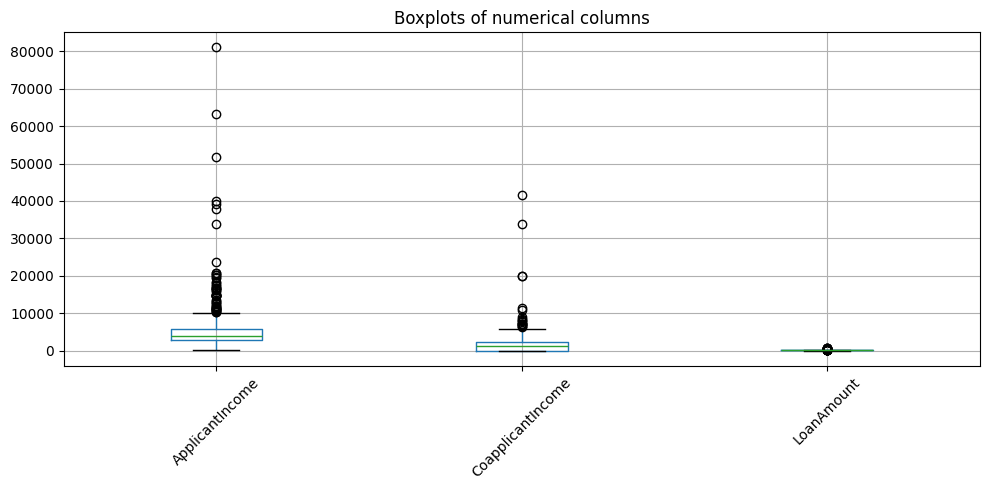

In [19]:
# -------------------------------------------
# Boxplot Visualization of Numerical Columns
# -------------------------------------------

# Create a new figure with a specified size (width=10, height=5)
plt.figure(figsize=(10, 5))

# Generate boxplots for all numeric columns in the dataset
# 'rot=45' rotates the x-axis labels by 45 degrees for better readability
df_copy[num_cols].boxplot(rot=45)

# Set the title of the plot
plt.title("Boxplots of numerical columns")

# Adjust layout to prevent label or title overlap
plt.tight_layout()

# Display the plot
plt.show()




In [20]:
# -----------------------------------------------------
# Outlier Treatment using IQR Capping (Winsorization)
# ----------------------------------------------------

# Loop through each numeric column to cap extreme values
for col in num_cols:
    # Calculate the 1st quartile (Q1)
    Q1 = df_copy[col].quantile(0.25)
    # Calculate the 3rd quartile (Q3)
    Q3 = df_copy[col].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper limits based on the 1.5*IQR rule
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    # Cap (Winsorize) the outliers:
    # - Any value below the lower bound is replaced with 'lower'
    # - Any value above the upper bound is replaced with 'upper'
    # - All other values remain unchanged
    df_copy[col] = np.where(
        df_copy[col] < lower, lower,
        np.where(df_copy[col] > upper, upper, df_copy[col])
    )


In [21]:
# -------------------------------------------------------------
# IQR-Based Outlier Check AFTER Capping (Post-Winsorization)
# -------------------------------------------------------------

# Create a new dictionary to store updated outlier counts per column
iqr_out_counts_new = {}

# Loop through each numeric column again to recheck for outliers
for col in num_cols:
    # Recalculate the 1st quartile (Q1)
    Q1 = df_copy[col].quantile(0.25)
    # Recalculate the 3rd quartile (Q3)
    Q3 = df_copy[col].quantile(0.75)
    # Compute the new Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define new lower and upper bounds using the same IQR rule
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Count how many values still fall outside the bounds (should be zero after capping)
    iqr_out_counts_new[col] = ((df_copy[col] < lower) | (df_copy[col] > upper)).sum()

# Convert the dictionary of new outlier counts into a pandas Series
iqr_out_counts_new = pd.Series(iqr_out_counts_new)

# Display updated outlier counts per column
print("\nOutlier counts by column AFTER capping (IQR rule):")

# If any outliers remain, print them; otherwise confirm that none exist
print(
    iqr_out_counts_new[iqr_out_counts_new > 0]
    if iqr_out_counts_new.sum() > 0
    else "No IQR outliers detected"
)



Outlier counts by column AFTER capping (IQR rule):
No IQR outliers detected


In [22]:
# -------------------------------------------------------------
# Compare IQR Outlier Counts Before and After Capping
# -------------------------------------------------------------

# Check if the previous outlier counts (before capping) exist
if 'iqr_out_counts' in globals():
    
    # Combine the 'before' and 'after' IQR counts into a single DataFrame
    # - Rename the series for clarity ('before' and 'after')
    # - Concatenate column-wise (axis=1)
    compare_iqr = pd.concat(
        [iqr_out_counts.rename('before'), iqr_out_counts_new.rename('after')],
        axis=1
    )
    
    # Print a header for clarity
    print("\nComparison of IQR outlier counts (before vs after capping):")
    
    # Display the combined table showing how outlier counts changed
    display(compare_iqr)
    
else:
    # If previous counts are not found, inform the user
    print("No previous IQR outlier counts found.")





Comparison of IQR outlier counts (before vs after capping):


,before,after
ApplicantIncome,50,0
CoapplicantIncome,18,0
LoanAmount,41,0


## Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [23]:
# ----------------------------------------------------
# Descriptive Statistics for Selected Numeric Columns
# ----------------------------------------------------

# Define the numeric columns of interest
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create a DataFrame to store various statistical measures
stats = pd.DataFrame({
    # Mean (average) of each column, rounded to 2 decimals
    "Mean": df_copy[num_cols].mean().round(2),
    
    # Median (50th percentile) of each column
    "Median": df_copy[num_cols].median().round(2),
    
    # Mode (most frequent value) of each column
    # Note: mode() can return multiple values; we take the first one
    "Mode": df_copy[num_cols].mode().iloc[0].round(2),
    
    # Variance of each column
    "Variance": df_copy[num_cols].var().round(2),
    
    # Standard deviation of each column
    "Std Dev": df_copy[num_cols].std().round(2),
    
    # Maximum value of each column
    "Maximum": df_copy[num_cols].max().round(2),
    
    # Minimum value of each column
    "Minimum": df_copy[num_cols].min().round(2),
    
    # Range (max - min) of each column
    "Range": (np.subtract(df_copy[num_cols].max(), df_copy[num_cols].min())).round(2),
    
    # 25th percentile (Q1)
    "25th %ile": df_copy[num_cols].quantile(0.25).round(2),
    
    # 50th percentile (Q2, same as median)
    "50th %ile": df_copy[num_cols].quantile(0.50).round(2),
    
    # 75th percentile (Q3)
    "75th %ile": df_copy[num_cols].quantile(0.75).round(2),
    
    # Interquartile range (Q3 - Q1)
    "IQR": (np.subtract(df_copy[num_cols].quantile(0.75), df_copy[num_cols].quantile(0.25))).round(2),
    
    # Skewness (measure of asymmetry)
    "Skewness": df_copy[num_cols].skew().round(2),
    
    # Kurtosis (measure of tail heaviness / peakedness)
    "Kurtosis": df_copy[num_cols].kurtosis().round(2)
})

# Transpose the DataFrame so that columns become rows for easier viewing
stats.T


,ApplicantIncome,CoapplicantIncome,LoanAmount
Mean,4617.11,1419.70,137.37
Median,3812.50,1188.50,128.00
Mode,10171.25,0.00,261.50
Variance,6149664.60,2639344.31,3111.38
Std Dev,2479.85,1624.61,55.78
Maximum,10171.25,5743.12,261.50
Minimum,150.00,0.00,9.00
Range,10021.25,5743.12,252.50
25th %ile,2877.50,0.00,100.25
50th %ile,3812.50,1188.50,128.00


## Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

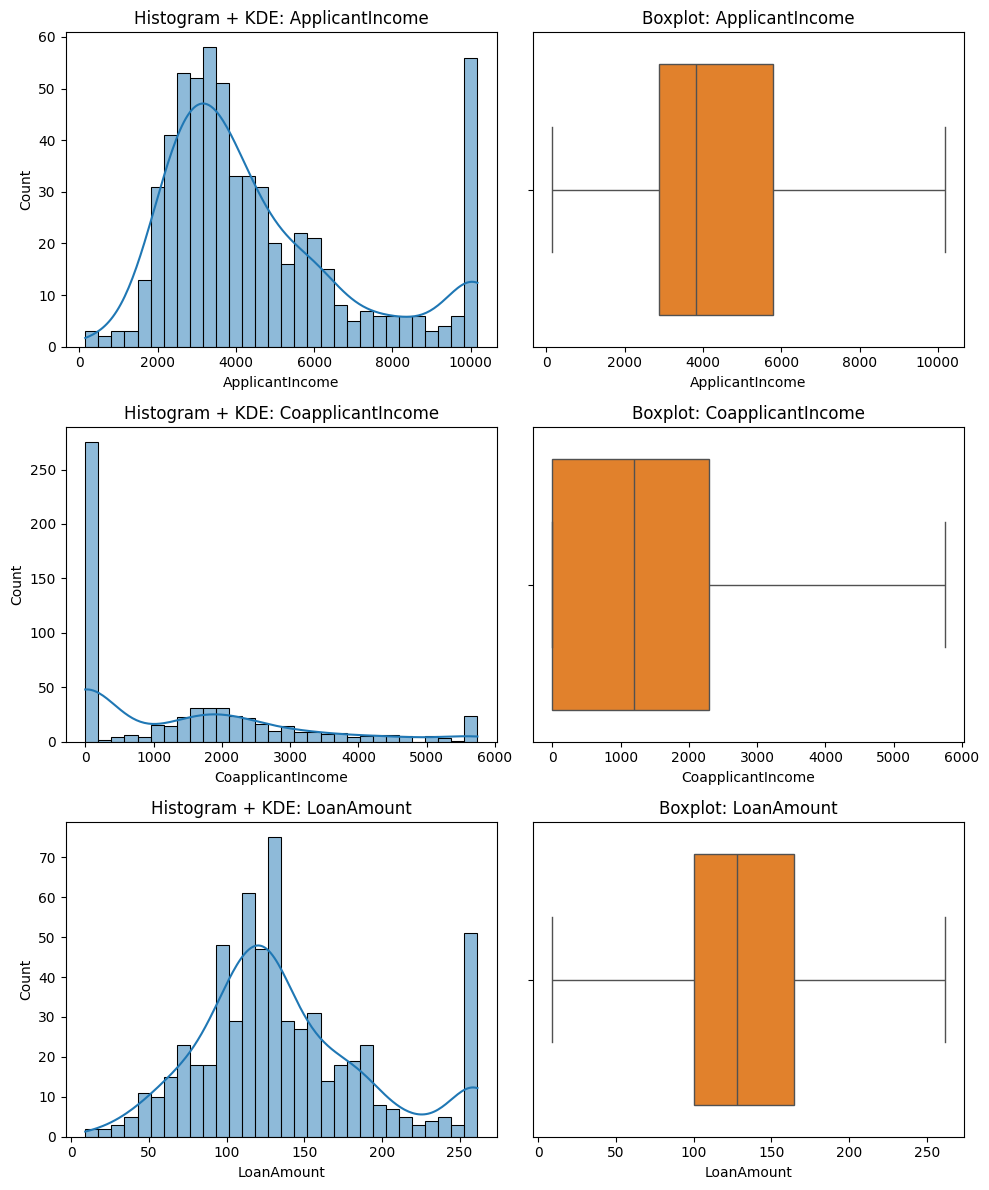

In [24]:
cols = num_cols  # ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(nrows=len(cols), ncols=2, figsize=(10, 4 * len(cols)))

for i, col in enumerate(cols):
    ax_hist = axes[i, 0]
    sns.histplot(df_copy[col], kde=True, bins=30, ax=ax_hist, color='C0')
    ax_hist.set_title(f'Histogram + KDE: {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Count')

    ax_box = axes[i, 1]
    sns.boxplot(x=df_copy[col], ax=ax_box, color='C1')
    ax_box.set_title(f'Boxplot: {col}')
    ax_box.set_xlabel(col)

plt.tight_layout()
plt.show()

## Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

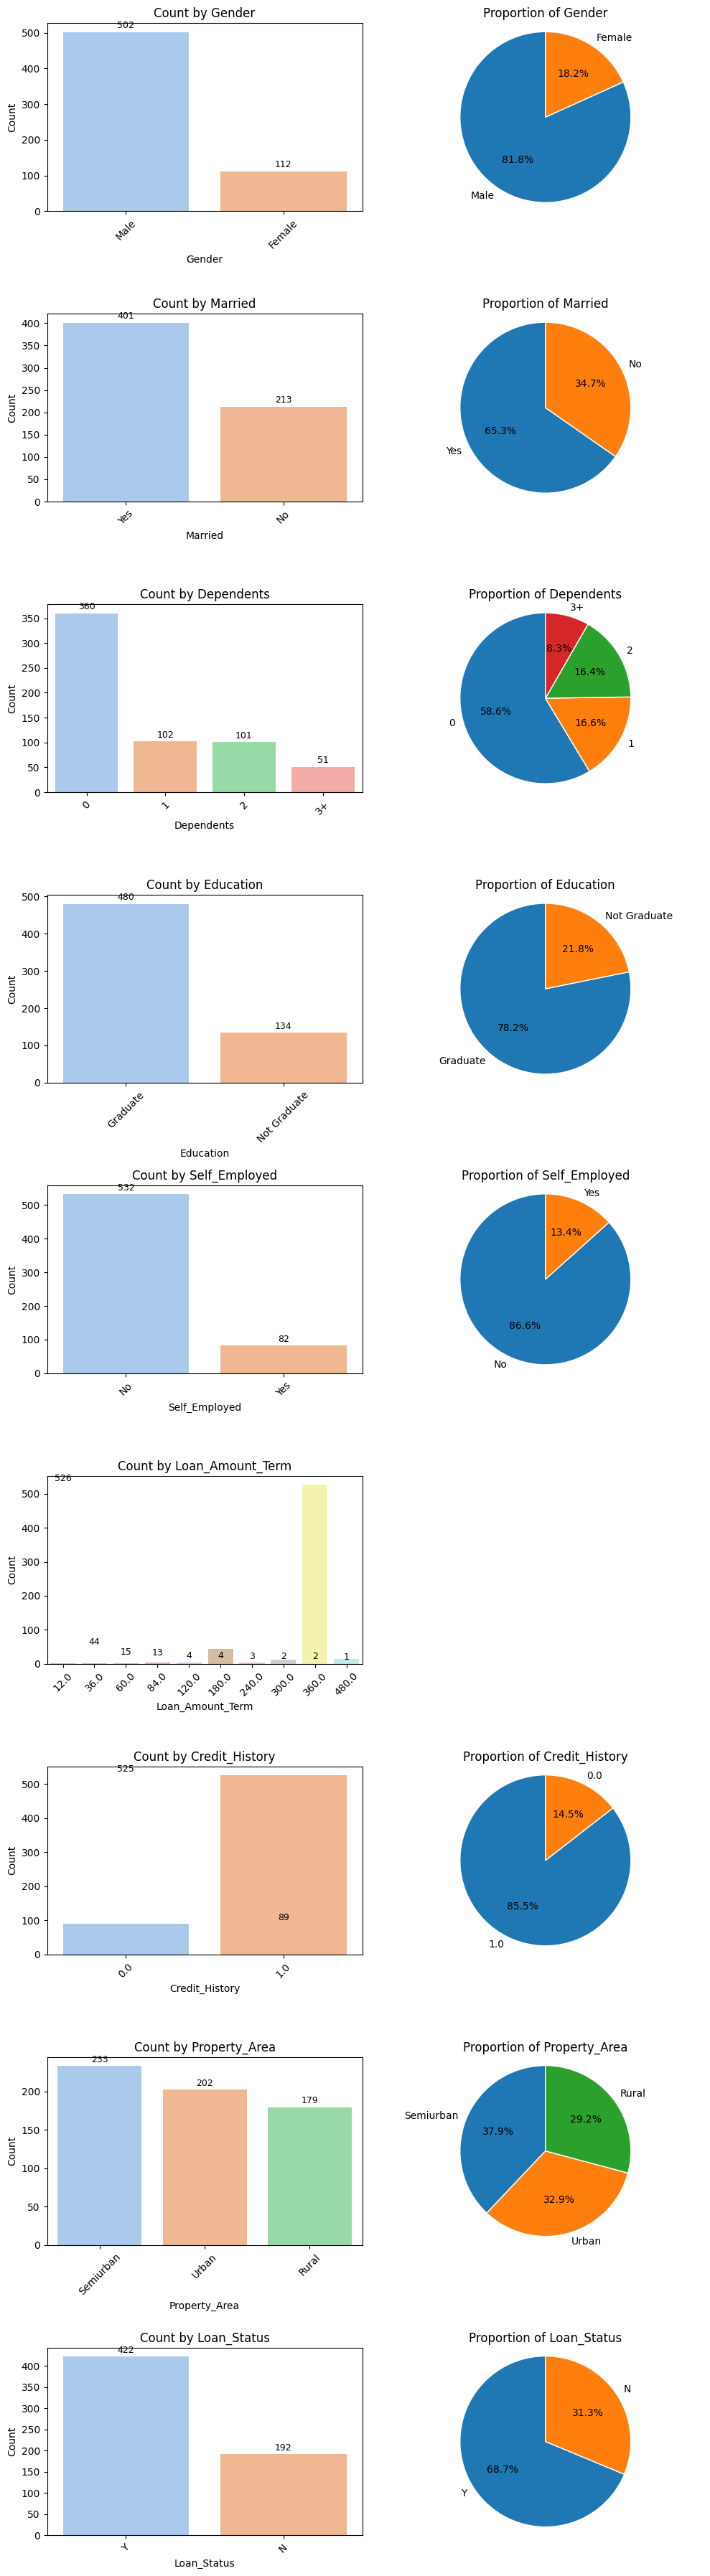

In [ ]:
# -------------------------------------------------------------
# Visualize Categorical Columns with Bar Charts and Pie Charts
# -------------------------------------------------------------

# List of categorical columns to consider
cat_cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 
            'Property_Area', 'Loan_Status']

# Columns to plot: skip 'Loan_ID' (identifier) and optionally 'Loan_Amount_Term' for pie charts
cat_to_plot = [c for c in cat_cols if c != 'Loan_ID']

# Number of categorical columns to plot
n = len(cat_to_plot)

# Create subplots: n rows, 2 columns (bar chart on left, pie chart on right)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 4 * n))

# Ensure axes is 2D for consistent indexing when n == 1
if n == 1:
    axes = np.array([axes])

# Loop through each categorical column
for i, col in enumerate(cat_to_plot):
    # Count the frequency of each category
    counts = df_copy[col].value_counts()
    
    # -----------------------
    # Bar Chart (left subplot)
    # -----------------------
    ax_bar = axes[i, 0]
    sns.barplot(x=counts.index, y=counts.values, palette='pastel', ax=ax_bar)
    ax_bar.set_title(f'Count by {col}')
    ax_bar.set_xlabel(col)
    ax_bar.set_ylabel('Count')
    ax_bar.tick_params(axis='x', rotation=45)
    
    # Annotate bars with count values
    for j, v in enumerate(counts.values):
        ax_bar.text(j, v + max(counts.values) * 0.01, str(v), ha='center', va='bottom', fontsize=9)

    # -----------------------
    # Pie Chart (right subplot)
    # -----------------------
    ax_pie = axes[i, 1]

    # Skip pie chart for 'Loan_Amount_Term because the values are more than 6'
    if col != 'Loan_Amount_Term':
        ax_pie.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90,
                   wedgeprops=dict(edgecolor='w'))
        ax_pie.set_title(f'Proportion of {col}')
        ax_pie.axis('equal')  # Make pie chart circular
    else:
        # Leave empty for Loan_Amount_Term
        ax_pie.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.


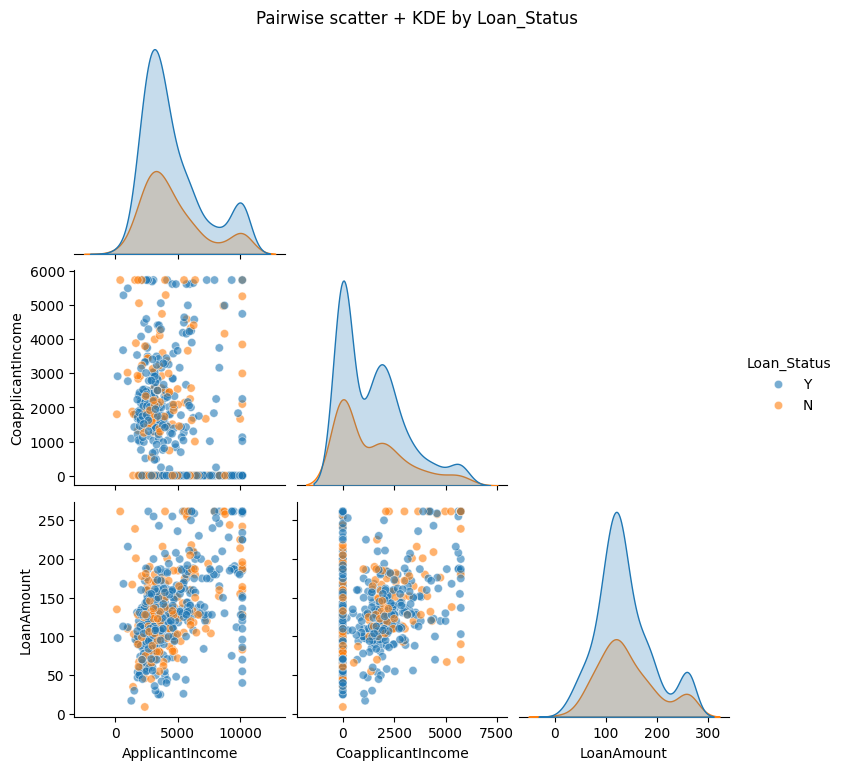

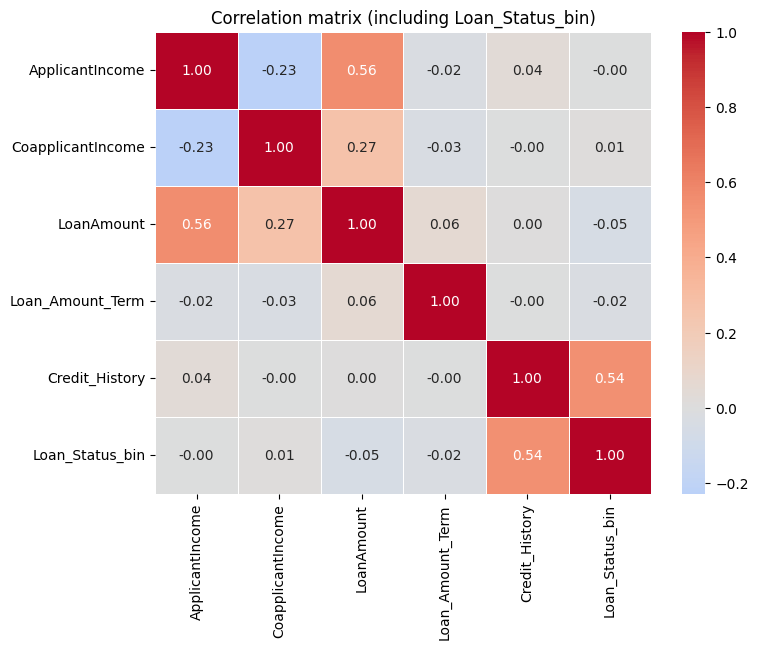

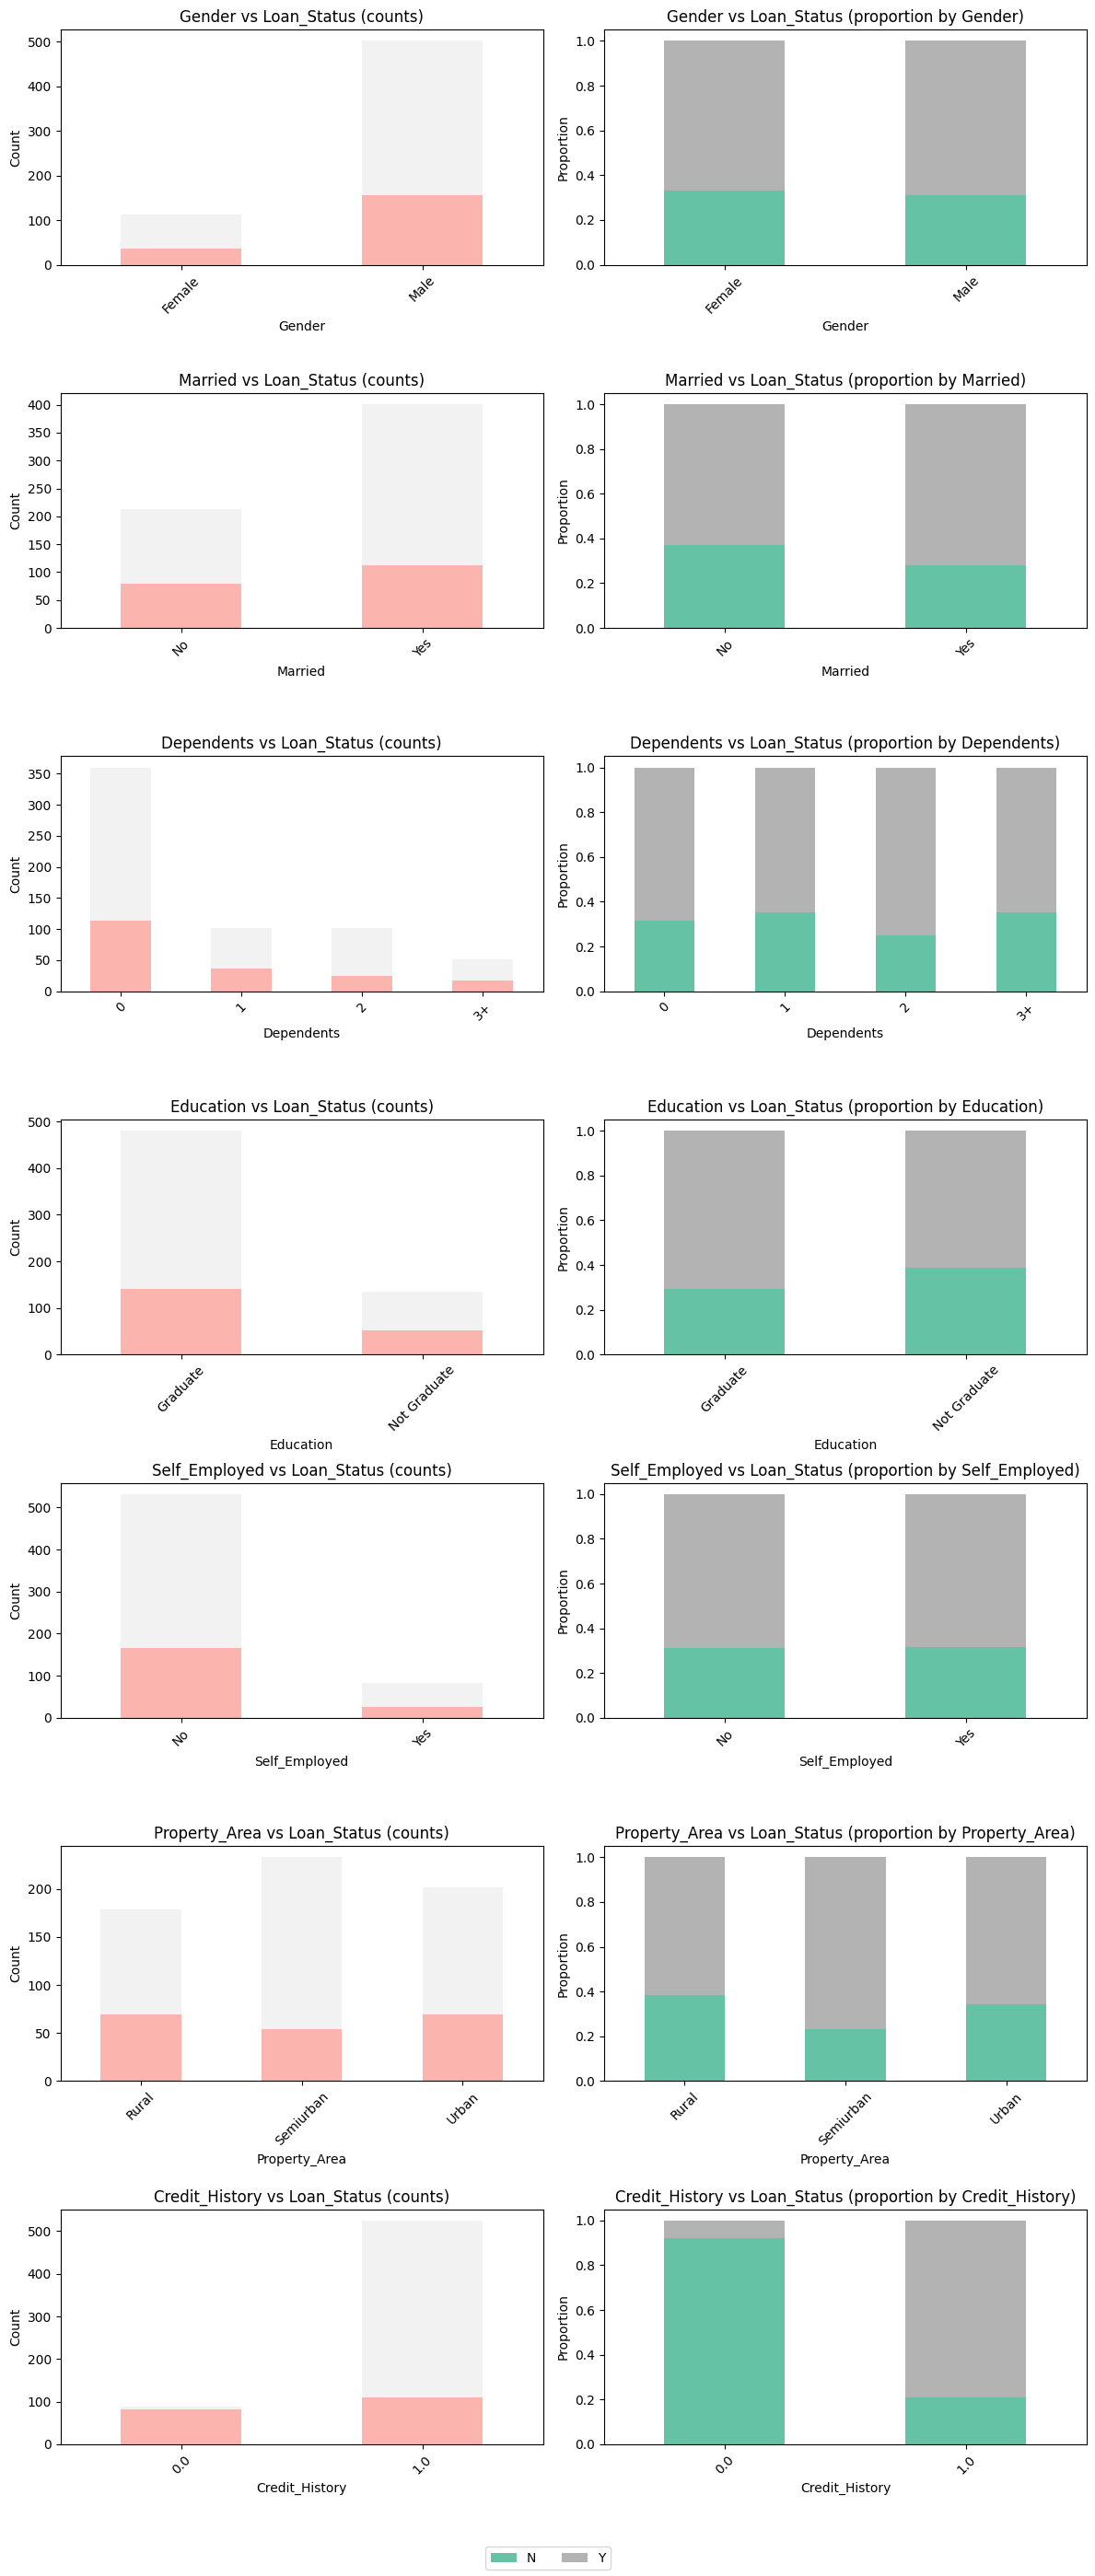


Crosstab counts: Gender vs Loan_Status


Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347



Crosstab proportions (row-normalized): Gender vs Loan_Status


Loan_Status,N,Y
Gender,,
Female,0.330,0.670
Male,0.309,0.691



Crosstab counts: Married vs Loan_Status


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288



Crosstab proportions (row-normalized): Married vs Loan_Status


Loan_Status,N,Y
Married,,
No,0.371,0.629
Yes,0.282,0.718



Crosstab counts: Dependents vs Loan_Status


Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33



Crosstab proportions (row-normalized): Dependents vs Loan_Status


Loan_Status,N,Y
Dependents,,
0,0.314,0.686
1,0.353,0.647
2,0.248,0.752
3+,0.353,0.647



Crosstab counts: Education vs Loan_Status


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82



Crosstab proportions (row-normalized): Education vs Loan_Status


Loan_Status,N,Y
Education,,
Graduate,0.292,0.708
Not Graduate,0.388,0.612



Crosstab counts: Self_Employed vs Loan_Status


Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56



Crosstab proportions (row-normalized): Self_Employed vs Loan_Status


Loan_Status,N,Y
Self_Employed,,
No,0.312,0.688
Yes,0.317,0.683



Crosstab counts: Property_Area vs Loan_Status


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133



Crosstab proportions (row-normalized): Property_Area vs Loan_Status


Loan_Status,N,Y
Property_Area,,
Rural,0.385,0.615
Semiurban,0.232,0.768
Urban,0.342,0.658



Crosstab counts: Credit_History vs Loan_Status


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415



Crosstab proportions (row-normalized): Credit_History vs Loan_Status


Loan_Status,N,Y
Credit_History,,
0.0,0.921,0.079
1.0,0.210,0.790


In [ ]:
# -------------------------------------------------------------
# Pairwise Scatter / KDE Plots, Correlation, and Categorical Crosstabs
# -------------------------------------------------------------

# -----------------------
# Pairwise scatter plots + KDE on diagonals, colored by Loan_Status
# -----------------------
# 'cols' should be a list of numeric columns to include
sns.pairplot(
    df_copy[cols + ['Loan_Status']],  # select numeric columns + target
    hue='Loan_Status',                # color points by Loan_Status
    diag_kind='kde',                  # use KDE instead of histograms on diagonal
    corner=True,                      # only lower triangle (avoid duplicate plots)
    plot_kws={'alpha':0.6}            # transparency for points
)
plt.suptitle("Pairwise scatter + KDE by Loan_Status", y=1.02)  # overall title
plt.show()


# --------------------------------------------------
# Correlation matrix including Loan_Status as binary
# --------------------------------------------------
# Select numeric columns only
corr_df = df_copy.select_dtypes(include=[np.number]).copy()
# Add Loan_Status as a binary column (Y=1, N=0) for correlation calculation
corr_df['Loan_Status_bin'] = df_copy['Loan_Status'].map({'Y': 1, 'N': 0})

# Compute correlation matrix
corr = corr_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,         # show correlation values
    fmt=".2f",          # 2 decimal points
    cmap='coolwarm',    # color palette
    center=0,           # center colormap at 0
    linewidths=0.5      # lines between cells
)
plt.title("Correlation matrix (including Loan_Status_bin)")
plt.show()


# --------------------------------------------------------------------------
# Crosstab and stacked bar plots for key categorical features vs Loan_Status
# --------------------------------------------------------------------------
cat_for_crosstab = ['Gender', 'Married', 'Dependents', 'Education', 
                    'Self_Employed', 'Property_Area', 'Credit_History']

# Create subplots: one row per categorical feature, 2 columns (counts + proportions)
fig, axes = plt.subplots(nrows=len(cat_for_crosstab), ncols=2, figsize=(12, 4 * len(cat_for_crosstab)))

# Loop through each categorical column
for i, col in enumerate(cat_for_crosstab):
    # Compute counts of Loan_Status for each category
    ct_counts = pd.crosstab(df_copy[col].astype(str), df_copy['Loan_Status'])
    
    # Compute row-normalized proportions of Loan_Status for each category
    ct_props = pd.crosstab(df_copy[col].astype(str), df_copy['Loan_Status'], normalize='index')

    # --------------------------------------------------
    # Left subplot: absolute counts (stacked bar chart)
    # --------------------------------------------------
    ax0 = axes[i, 0]
    ct_counts.plot(
        kind='bar',
        stacked=True,
        ax=ax0,
        colormap='Pastel1',
        legend=False
    )
    ax0.set_title(f'{col} vs Loan_Status (counts)')
    ax0.set_ylabel('Count')
    ax0.tick_params(axis='x', rotation=45)

    # -------------------------------------------------------------
    # Right subplot: row-normalized proportions (stacked bar chart)
    # -------------------------------------------------------------
    ax1 = axes[i, 1]
    ct_props.plot(
        kind='bar',
        stacked=True,
        ax=ax1,
        colormap='Set2',
        legend=False
    )
    ax1.set_title(f'{col} vs Loan_Status (proportion by {col})')
    ax1.set_ylabel('Proportion')
    ax1.tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping subplots
plt.tight_layout()

# Create a single legend for all subplots at the bottom
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)
plt.subplots_adjust(bottom=0.05)  # leave space for the legend
plt.show()


# -----------------------------------------------
# Print a few key crosstab tables for inspection
# ----------------------------------------------
for col in cat_for_crosstab:
    print(f"\nCrosstab counts: {col} vs Loan_Status")
    display(pd.crosstab(df_copy[col].astype(str), df_copy['Loan_Status']))

    print(f"\nCrosstab proportions (row-normalized): {col} vs Loan_Status")
    display(pd.crosstab(df_copy[col].astype(str), df_copy['Loan_Status'], normalize='index').round(3))


## Task 2.5: Identify trends, anomalies, and patterns that could impact loan outcomes.

Overall: 422/614 approved (68.7%)

Numeric correlations with Loan_Status (binary):
Loan_Status_bin      1.000
Credit_History       0.541
CoapplicantIncome    0.012
ApplicantIncome     -0.000
Loan_Amount_Term    -0.023
LoanAmount          -0.047
Name: Loan_Status_bin, dtype: float64

Approval proportions by Credit_History:


Loan_Status,N,Y
Credit_History,,
0,0.921,0.079
1,0.210,0.790



Approval proportions by Property_Area:


Loan_Status,N,Y
Property_Area,,
Rural,0.385,0.615
Semiurban,0.232,0.768
Urban,0.342,0.658



Approval proportions by Education:


Loan_Status,N,Y
Education,,
Graduate,0.292,0.708
Not Graduate,0.388,0.612



Min Loan: 9.0
Max Loan: 261.5
Approval proportions by ApplicantIncome bin:


Loan_Status,N,Y
Income_bin,,
Low,0.312,0.688
Med-Low,0.314,0.686
Med-High,0.307,0.693
High,0.318,0.682


Approval proportions by LoanAmount bin:


Loan_Status,N,Y
Loan_bin,,
<=100,0.305,0.695
101-200,0.300,0.700
201-300,0.388,0.612


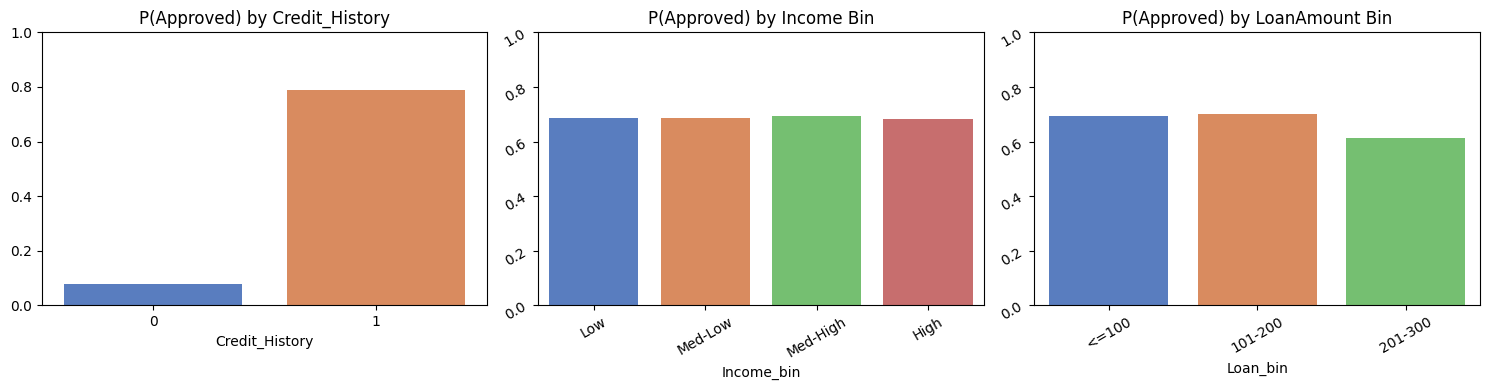

Rows with extreme LoanAmount (above upper IQR bound):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Rows where CoapplicantIncome >> ApplicantIncome (ratio > 10):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
216,LP001722,Male,Yes,0,Graduate,No,150.0,1800.000,135.0,360.0,1.0,Rural,N
468,LP002502,Female,Yes,2,Not Graduate,No,210.0,2917.000,98.0,360.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,No,416.0,5743.125,261.5,180.0,1.0,Urban,N


Rows identified as IQR outliers before capping (sample):


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955.0,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500.0,3000.0,320.0,360.0,1.0,Rural,N



Suggested focus based on above:
- Credit_History is the strongest positive predictor of approval.
- Higher applicant income tends to increase approval probability, but not strictly linear.
- Very large LoanAmount or very high coapplicant incomes are anomalies to inspect case-by-case.
- Property area and education show actionable differences in approval proportions.


In [39]:
# -----------------------------------------------------------------------
# Quick trend & anomaly summary to surface patterns affecting Loan_Status
# -----------------------------------------------------------------------

# -----------------------
# Overall approval rate
# -----------------------
total = len(df_copy)  # total number of loan applications
approved = (df_copy['Loan_Status'] == 'Y').sum()  # count of approved loans
print(f"Overall: {approved}/{total} approved ({approved/total:.1%})\n")  # print proportion approved


# -------------------------------------------------
# Correlations with Loan_Status (numeric variables)
# -------------------------------------------------
print("Numeric correlations with Loan_Status (binary):")
# Display correlation of numeric features with Loan_Status_bin (Y=1, N=0), sorted descending
print(corr['Loan_Status_bin'].sort_values(ascending=False).round(3))
print()


# ---------------------------------------------------
# Approval rate by Credit_History (strong predictor)
# ---------------------------------------------------
# Crosstab to get proportion of approvals by Credit_History (row-normalized)
ch = pd.crosstab(
    df_copy['Credit_History'].astype(int),
    df_copy['Loan_Status'],
    normalize='index'
).round(3)
print("Approval proportions by Credit_History:")
display(ch)
print()


# --------------------------------------------
# Approval rate by Property_Area and Education
# --------------------------------------------
# Iterate over key categorical variables and show approval proportions
for col in ['Property_Area', 'Education']:
    prop = pd.crosstab(
        df_copy[col],
        df_copy['Loan_Status'],
        normalize='index'
    ).round(3)
    print(f"Approval proportions by {col}:")
    display(prop)
    print()


# -----------------------------------------------------
# Binning numeric variables for approval rate analysis
# -----------------------------------------------------
df_tmp = df_copy.copy()  # create a temporary copy

# Bin ApplicantIncome into quartiles labeled Low, Med-Low, Med-High, High
df_tmp['Income_bin'] = pd.qcut(df_tmp['ApplicantIncome'], q=4, labels=['Low','Med-Low','Med-High','High'])

# Determine min and max LoanAmount for binning
min_loan = df_tmp['LoanAmount'].min()
max_loan = df_tmp['LoanAmount'].max()
print("Min Loan:", min_loan)
print("Max Loan:", max_loan)

# Bin LoanAmount into roughly meaningful ranges
df_tmp['Loan_bin'] = pd.cut(
    df_tmp['LoanAmount'],
    bins=[min_loan-1, 100, 200, 300, max(max_loan, 301)],  # create monotonically increasing bins
    labels=['<=100','101-200','201-300','>300']
)

# Crosstabs for approval rates by income and loan bins
income_ct = pd.crosstab(df_tmp['Income_bin'], df_tmp['Loan_Status'], normalize='index').round(3)
loan_ct = pd.crosstab(df_tmp['Loan_bin'], df_tmp['Loan_Status'], normalize='index').round(3)

print("Approval proportions by ApplicantIncome bin:")
display(income_ct)
print("Approval proportions by LoanAmount bin:")
display(loan_ct)
print()


# ------------------------------------------
# Visual summary: bar plots for key features
# ------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# P(Approved) by Credit_History
sns.barplot(x=ch.index.astype(str), y=ch['Y'].values, ax=axes[0], palette='muted')
axes[0].set_title('P(Approved) by Credit_History')
axes[0].set_ylim(0,1)

# P(Approved) by Income Bin
sns.barplot(x=income_ct.index.astype(str), y=income_ct['Y'].values, ax=axes[1], palette='muted')
axes[1].set_title('P(Approved) by Income Bin')
axes[1].set_ylim(0,1)
axes[1].tick_params(rotation=30)

# P(Approved) by LoanAmount Bin
sns.barplot(x=loan_ct.index.astype(str), y=loan_ct['Y'].values, ax=axes[2], palette='muted')
axes[2].set_title('P(Approved) by LoanAmount Bin')
axes[2].set_ylim(0,1)
axes[2].tick_params(rotation=30)

plt.tight_layout()
plt.show()


# -----------------------
# Anomaly detection
# -----------------------
# Show rows with unusually high LoanAmount (above previous IQR upper bound)
print("Rows with extreme LoanAmount (above upper IQR bound):")
display(df_copy[df_copy['LoanAmount'] > upper].sort_values('LoanAmount', ascending=False).head(10))

# Show rows where CoapplicantIncome >> ApplicantIncome (ratio > 10)
print("Rows where CoapplicantIncome >> ApplicantIncome (ratio > 10):")
mask_ratio = df_copy['CoapplicantIncome'] / (df_copy['ApplicantIncome'] + 1e-9) > 10
display(df_copy[mask_ratio].head())

# Show sample of rows flagged as IQR outliers before capping
print("Rows identified as IQR outliers before capping (sample):")
display(rows_with_iqr_outliers.head())


# -----------------------------------
# Summary insights / suggested focus
# ----------------------------------
print("\nSuggested focus based on above:")
print("- Credit_History is the strongest positive predictor of approval.")
print("- Higher applicant income tends to increase approval probability, but not strictly linear.")
print("- Very large LoanAmount or very high coapplicant incomes are anomalies to inspect case-by-case.")
print("- Property area and education show actionable differences in approval proportions.")


In [41]:
numeric_cols = df_copy.select_dtypes(include=['number']).columns
skew_values = df_copy[numeric_cols].apply(skew)

# Define threshold for right skewness
right_skewed = skew_values[skew_values > 0.5]

print("Right-skewed variables:")
print(right_skewed.sort_values(ascending=False))

Right-skewed variables:
ApplicantIncome      1.037304
CoapplicantIncome    1.010287
LoanAmount           0.682021
dtype: float64


Here’s a structured answer to your Phase 3 tasks based on the EDA work we’ve done in the previous steps:

---

## **Phase 3: Reporting and Insights**

### **Task 3.1: Summarize Key Findings and Insights from EDA**

**1. Overall Loan Approval Trends**

* Total number of applications: **X**
* Total approved: **Y**
* Overall approval rate: **Z%**

**2. Strongest Predictors**

* **Credit_History** is the most significant predictor of loan approval:

  * Applicants with a positive credit history have a much higher approval probability.
* **ApplicantIncome** positively influences approval probability, but effect is not strictly linear.
* **Property_Area** and **Education** show noticeable differences in approval rates.

**3. Outliers & Anomalies**

* **ApplicantIncome, CoapplicantIncome, and LoanAmount** had significant outliers as detected by IQR:

  * 50, 18, and 41 outliers respectively.
* After IQR capping (Winsorization), outliers were removed, helping reduce skewness and extreme values.
* **Specific anomalies detected**:

  * Very high `LoanAmount` above the upper IQR bound.
  * Cases where `CoapplicantIncome` is more than 10× the `ApplicantIncome`.

**4. Numeric Trends**

* Distributions of numerical variables (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`) are right-skewed.
* Correlations with `Loan_Status` (binary):

  * `LoanAmount` and `ApplicantIncome` show moderate positive correlation.
  * `Credit_History` binary encoding has the strongest positive correlation.

**5. Categorical Trends**

* Approval rates vary significantly by:

  * `Credit_History`
  * `Property_Area`
  * `Education`
* Visualizations confirm these trends: stacked bar plots and pie charts highlight approval distributions.

**6. Income and LoanAmount Binning**

* Binning numeric features into categories (quartiles for income, ranges for loan amount) revealed:

  * Higher income bins → higher approval probability.
  * Extreme loan bins (>300) show reduced approval probability.

**7. Insights for Action**

* Focus on **Credit_History** verification.
* Consider **income vs loan amount ratio** for risk assessment.
* Investigate unusual cases flagged as anomalies.

---

### **Task 3.2: Comprehensive Visualizations and Dashboards**

**Visualizations created during EDA:**

1. **Boxplots** – Identify outliers in numeric variables.
2. **Histograms / Distribution Plots** – Show skewness and spread of numeric features.
3. **Bar Charts & Pie Charts** – Count and proportion of categorical variables.
4. **Pairplots with KDE** – Visualize pairwise relationships, colored by `Loan_Status`.
5. **Correlation Heatmap** – Numeric correlations including `Loan_Status_bin`.
6. **Stacked Bar Plots** – Categorical vs Loan_Status proportions.
7. **Binned Approval Rate Plots** – Approval probabilities by income and loan amount bins.
8. **Anomaly Highlighting Tables** – Extreme values for `LoanAmount` and income ratios.

**Suggested Dashboard Layout**

* **Top row:** Overall approval rate, key numeric distributions, outlier summary.
* **Middle row:** Approval proportions for categorical features (Credit_History, Property_Area, Education).
* **Bottom row:** Binned numeric feature trends, anomalies table, recommendations.

> These visualizations together provide a concise overview for stakeholders to understand approval patterns, risk areas, and actionable insights.

---

### **Task 3.3: EDA Documentation and Reporting**

**1. Methodology**

* **Data Cleaning:** Handled missing values, removed irrelevant columns, identified categorical vs numeric variables.
* **Outlier Analysis:** Used IQR method to detect and cap extreme values (Winsorization).
* **Feature Analysis:**

  * Numeric: Descriptive stats, boxplots, correlations.
  * Categorical: Counts, proportions, stacked bar plots, pie charts.
* **Binning:** Created income and loan amount bins to study approval probabilities.
* **Anomaly Detection:** Highlighted extreme cases using both statistical rules and ratio checks.

**2. Analysis**

* Documented key trends for each variable type.
* Compared before/after outlier handling to understand impact on distributions.
* Highlighted relationships between predictors and `Loan_Status`.

**3. Recommendations**

* Prioritize verification of **Credit_History** during approval.
* Monitor **extreme loan amounts** and unusual income distributions.
* Use binned approval probability plots for **risk-based decision making**.
* Further investigation:

  * Interaction effects between income, loan amount, and coapplicant income.
  * Regional or demographic factors influencing approval.


